# NLP Project for Top Asian Netflix Shows

In the last 2 years, Netflix Asian TV series have gained much attention and popularity among international viewers. Some of these shows are gaining increase fan base around the world and thus the intention of this project is to identify the trending topics and characters as to create merchandise to sell on online shopping platform. 

<img src="https://www.themoviedb.org/t/p/original/20mOwAAPwZ1vLQkw0fvuQHiG7bO.jpg" width="24%" height="24%" style="display:inline-block" />
<img src="https://th.bing.com/th/id/OIP.X3OjRLUGg-plcwIAUSYeEwHaHa?pid=ImgDet&rs=1" width="36%" height="36%" style="display:inline-block" />
<img src="https://th.bing.com/th/id/OIP.ObD2hamV4zlCLHYaS4Y8QgHaKX?pid=ImgDet&rs=1" width="26%" height="26%" style="display:inline-block" />

### Objectives
- CLassification modelling to identify the show titles from subreddit posts. 
- Sentiment Analysis of the shows in order to indentify which shows have a larger fanbase to target online mechandise to them

### Methodology
Posts from were web scrapped from Reddit website and saved as CSV files for the following shows:
1. Squid Game
2. Alice in Borderland
3. Physical: 100 

The reason these three shows are used for text classification model is because they shared similar format in their contents. Alice in Borderland and Squid Game are fictitious drama series based on the life and death of contestants. Both shared similar concept of taking part in games for individuals' survival. Physical: 100 on the other hand is a game show where contestants eliminate one another to win a huge monetary prize. Although it is not exactly the same genre as the former two shows, it shares a similar concept as Squid Game of winning for a big monetary reward. These three shows are also top series on Netflix. 

Using NLTK (NLP language corpus), I have created a Sentiment Analysis of the 3 shows identifying which has more positive sentiment. In addition, a classification model is built to properly indentify the show titles from the posts. This will be used as a model to target fans of the specific shows based on the topics that they posted on social media.

### Tools / Libraries:
1. NLTK
2. SentimentIntensityAnalyzer
3. WordCloud
4. Tokenizer
5. TfIDF Vectorizer
6. SVC for classification

## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
analyzer = SIA()
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load Dataframe

In [2]:
df_squid = pd.read_csv('squidgame.csv')

In [3]:
df_alice = pd.read_csv('aliceborderland.csv')

In [4]:
df_physical = pd.read_csv('physical100.csv')

In [5]:
df_squid.head()

,headlines
0,Gi Hun’s actor Lee Jung-jae becoming a Directo...
1,Addressing the detectives phone battery
2,[Identify] What brand makes this grey bomber j...
3,about the food they gave at the players
4,Just watched tonight's Emmy acceptance speeche...


In [6]:
df_alice.head()

,headlines
0,"King Of Hearts Rules, my interpretation"
1,Alice in Borderland/Chishiya themed phone beca...
2,What would a Alice in Borderland videogame loo...
3,arisu
4,Alice in Borderland: The Cycle Continues part ...


In [7]:
df_physical.head()

,headlines
0,Dumb question about Sexyama’s hair
1,Sand match idea
2,When do new episodes release?
3,Physical 100 Drinking Game
4,"it was very short, but he makes me very happy"


### Create a Function for Sentiment Analysis

In [8]:
results=[]
def get_sentiment_score(df):
    for line in df.headlines:
        sentiment_score = analyzer.polarity_scores(line)
        sentiment_score['headlines'] = line
        results.append(sentiment_score)

### Sentiment Analysis for Squid Game

In [9]:
get_sentiment_score(df_squid)

In [10]:
squid_results=pd.DataFrame.from_records(results)
squid_results.head()

,neg,neu,pos,compound,headlines
0,0.00,1.000,0.000,0.0000,Gi Hun’s actor Lee Jung-jae becoming a Directo...
1,0.00,1.000,0.000,0.0000,Addressing the detectives phone battery
2,0.28,0.623,0.097,-0.5175,[Identify] What brand makes this grey bomber j...
3,0.00,1.000,0.000,0.0000,about the food they gave at the players
4,0.00,0.786,0.214,0.4588,Just watched tonight's Emmy acceptance speeche...


In [11]:
squid_results.describe()

,neg,neu,pos,compound
count,863.000000,863.000000,863.000000,863.000000
mean,0.045127,0.843518,0.110189,0.091781
std,0.112511,0.204790,0.181130,0.341965
min,0.000000,0.000000,0.000000,-0.865800
25%,0.000000,0.721500,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.204000,0.318200
max,0.676000,1.000000,1.000000,0.945100


In general, Squid Game comments are mostly neutral towards positive

In [12]:
def results_label(df):
    df['Label'] = 0
    df.loc[df['compound'] > 0.1, 'Label'] = 1
    df.loc[df['compound'] < -0.1, 'Label'] = -1
    print(df.head(3))
    return df

results_label(squid_results)

    neg    neu    pos  compound  \
0  0.00  1.000  0.000    0.0000   
1  0.00  1.000  0.000    0.0000   
2  0.28  0.623  0.097   -0.5175   

                                           headlines  Label  
0  Gi Hun’s actor Lee Jung-jae becoming a Directo...      0  
1            Addressing the detectives phone battery      0  
2  [Identify] What brand makes this grey bomber j...     -1  


,neg,neu,pos,compound,headlines,Label
0,0.00,1.000,0.000,0.0000,Gi Hun’s actor Lee Jung-jae becoming a Directo...,0
1,0.00,1.000,0.000,0.0000,Addressing the detectives phone battery,0
2,0.28,0.623,0.097,-0.5175,[Identify] What brand makes this grey bomber j...,-1
3,0.00,1.000,0.000,0.0000,about the food they gave at the players,0
4,0.00,0.786,0.214,0.4588,Just watched tonight's Emmy acceptance speeche...,1
...,...,...,...,...,...,...
858,0.00,0.755,0.245,0.0772,Squid Game The Challenge Callbacks,0
859,0.00,1.000,0.000,0.0000,What could be a feasible explanation to bring ...,0
860,0.00,1.000,0.000,0.0000,‘Squid Game’ remains the most searched South K...,0
861,0.00,0.546,0.454,0.7026,I hope Netflix doesn't go bankrupt before Seas...,1


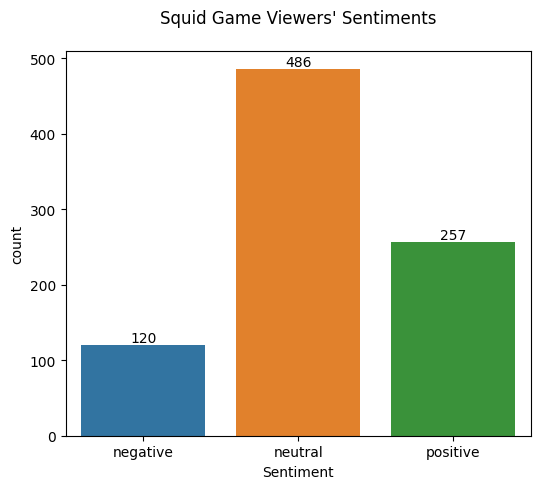

In [13]:
fig = plt.subplots(figsize=(6, 5))
ax = sns.countplot(x=squid_results.Label)
ax.set_xticklabels(["negative", "neutral", "positive"])
ax.set_xlabel("Sentiment")
ax.bar_label(ax.containers[0])
ax.set_title("Squid Game Viewers' Sentiments", y=1.05)
plt.show()

Plot graph shows that sentiment towards Squid Game is generally neutral to positive

### Sentiment Analysis for Alice in Borderland

In [14]:
results = []
get_sentiment_score(df_alice)

In [15]:
alice_results = pd.DataFrame.from_records(results)
alice_results.head()

,neg,neu,pos,compound,headlines
0,0.000,1.000,0.000,0.0000,"King Of Hearts Rules, my interpretation"
1,0.115,0.710,0.175,0.2732,Alice in Borderland/Chishiya themed phone beca...
2,0.000,0.737,0.263,0.3612,What would a Alice in Borderland videogame loo...
3,0.000,1.000,0.000,0.0000,arisu
4,0.000,1.000,0.000,0.0000,Alice in Borderland: The Cycle Continues part ...


In [16]:
results_label(alice_results)

     neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.115  0.710  0.175    0.2732   
2  0.000  0.737  0.263    0.3612   

                                           headlines  Label  
0            King Of Hearts Rules, my interpretation      0  
1  Alice in Borderland/Chishiya themed phone beca...      1  
2  What would a Alice in Borderland videogame loo...      1  


,neg,neu,pos,compound,headlines,Label
0,0.000,1.000,0.000,0.0000,"King Of Hearts Rules, my interpretation",0
1,0.115,0.710,0.175,0.2732,Alice in Borderland/Chishiya themed phone beca...,1
2,0.000,0.737,0.263,0.3612,What would a Alice in Borderland videogame loo...,1
3,0.000,1.000,0.000,0.0000,arisu,0
4,0.000,1.000,0.000,0.0000,Alice in Borderland: The Cycle Continues part ...,0
...,...,...,...,...,...,...
989,0.750,0.250,0.000,-0.4588,Ep 7 Sucked,-1
990,0.000,1.000,0.000,0.0000,Alice in Borderland Season 2 eps 1 & 2 podcast!,0
991,0.000,1.000,0.000,0.0000,(almost) the whole gang is here!,0
992,0.000,1.000,0.000,0.0000,Looking to buy Chishiya S02 Jacket,0


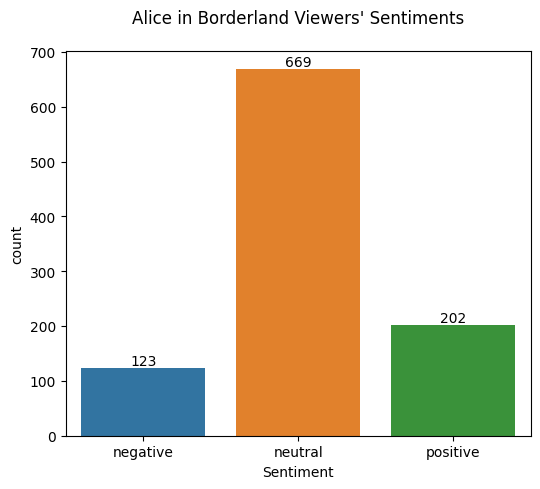

In [17]:
fig = plt.subplots(figsize=(6, 5))
ax = sns.countplot(x=alice_results.Label)
ax.set_xticklabels(["negative", "neutral", "positive"])
ax.set_xlabel("Sentiment")
ax.bar_label(ax.containers[0])
ax.set_title("Alice in Borderland Viewers' Sentiments", y=1.05)
plt.show()

Plot graph shows that Alice in Borderland are generally neutral and towards positive. However, the shows have lower positive sentiment than Squid Game

### Sentiment Analysis of Physical: 100

In [18]:
results=[]
get_sentiment_score(df_physical)

In [19]:
physical_results = pd.DataFrame.from_records(results)
physical_results.head()

,neg,neu,pos,compound,headlines
0,0.452,0.548,0.000,-0.5106,Dumb question about Sexyama’s hair
1,0.000,1.000,0.000,0.0000,Sand match idea
2,0.000,1.000,0.000,0.0000,When do new episodes release?
3,0.000,1.000,0.000,0.0000,Physical 100 Drinking Game
4,0.000,0.621,0.379,0.7572,"it was very short, but he makes me very happy"


In [20]:
results_label(physical_results)

     neg    neu  pos  compound                           headlines  Label
0  0.452  0.548  0.0   -0.5106  Dumb question about Sexyama’s hair     -1
1  0.000  1.000  0.0    0.0000                     Sand match idea      0
2  0.000  1.000  0.0    0.0000       When do new episodes release?      0


,neg,neu,pos,compound,headlines,Label
0,0.452,0.548,0.000,-0.5106,Dumb question about Sexyama’s hair,-1
1,0.000,1.000,0.000,0.0000,Sand match idea,0
2,0.000,1.000,0.000,0.0000,When do new episodes release?,0
3,0.000,1.000,0.000,0.0000,Physical 100 Drinking Game,0
4,0.000,0.621,0.379,0.7572,"it was very short, but he makes me very happy",1
...,...,...,...,...,...,...
858,0.365,0.635,0.000,-0.3182,the guy who fought sexyama,-1
859,0.000,0.385,0.615,0.4939,Quest inspired workouts,1
860,0.000,1.000,0.000,0.0000,Who were the siblings?,0
861,0.531,0.469,0.000,-0.5267,This show is stupid,-1


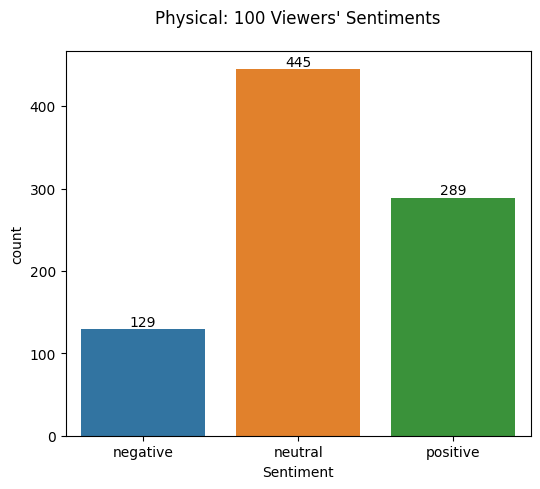

In [21]:
fig = plt.subplots(figsize=(6, 5))
ax = sns.countplot(x=physical_results.Label)
ax.set_xticklabels(["negative", "neutral", "positive"])
ax.set_xlabel("Sentiment")
ax.bar_label(ax.containers[0])
ax.set_title("Physical: 100 Viewers' Sentiments", y=1.05)
plt.show()

Physical: 100 shows the most positive sentiment among the 3 shows. As such, direction should focus more on selling Physical: 100 mechandise than the other 2. This can be explained as the show appeals to different people based on their preference of gender, body physique and sports that each contestants represent. 

### Comparison of Sentiment for Three Shows

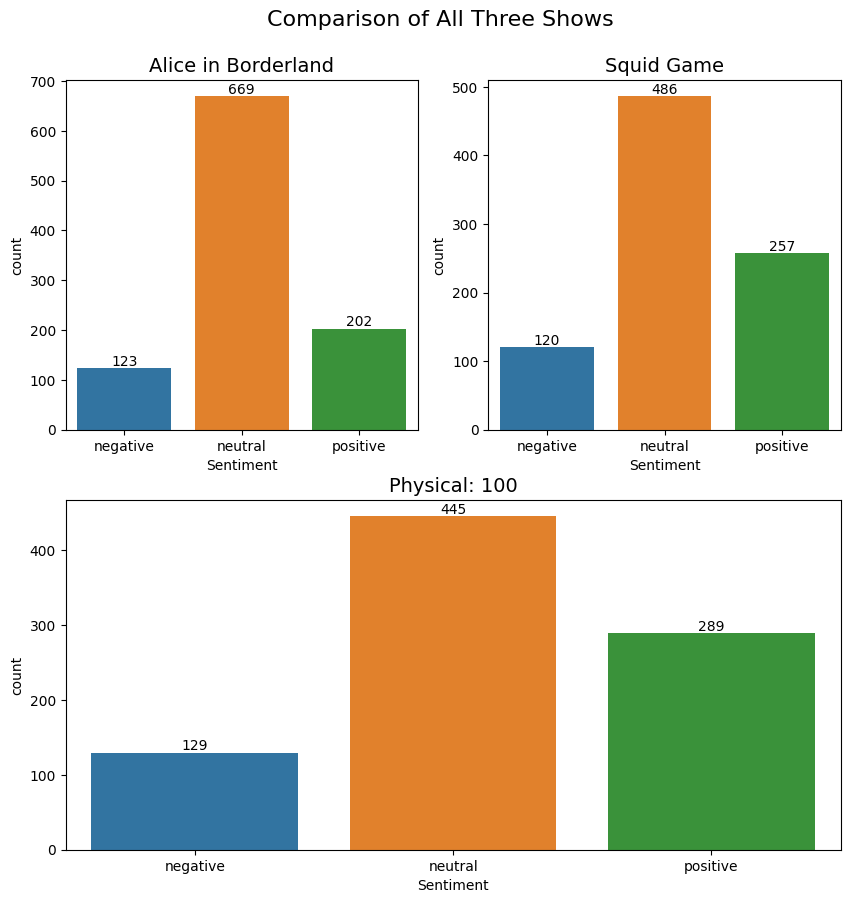

In [22]:
# Create a figure with two subplots
fig = plt.figure(figsize=(10,10))

# Add subplots with specified position and size (in fractions of figure width and height) 
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

# Plot the first countplot (alice in borderland) on the first axis
sns.countplot(x=alice_results.Label, ax=ax1)
ax1.set_xticklabels(["negative", "neutral", "positive"])
ax1.set_xlabel("Sentiment")
ax1.bar_label(ax1.containers[0])
ax1.set_title("Alice in Borderland", fontsize=14)

# Plot the second countplot (squidgame) on the second axis
sns.countplot(x=squid_results.Label, ax=ax2)
ax2.set_xticklabels(["negative", "neutral", "positive"])
ax2.set_xlabel("Sentiment")
ax2.bar_label(ax2.containers[0])
ax2.set_title("Squid Game", fontsize=14)

# Plot the second countplot (squidgame) on the second axis
sns.countplot(x=physical_results.Label, ax=ax3)
ax3.set_xticklabels(["negative", "neutral", "positive"])
ax3.set_xlabel("Sentiment")
ax3.bar_label(ax3.containers[0])
ax3.set_title("Physical: 100", fontsize=14)

# title of plot
fig.suptitle("Comparison of All Three Shows", fontsize=16, y=0.95)

# Show the plot
plt.show()

Based on the graphs comparison, merchandise should focus more on both Korean Tv series (Squid Game & Physical: 100)

## Wordcloud

In [23]:
from wordcloud import WordCloud

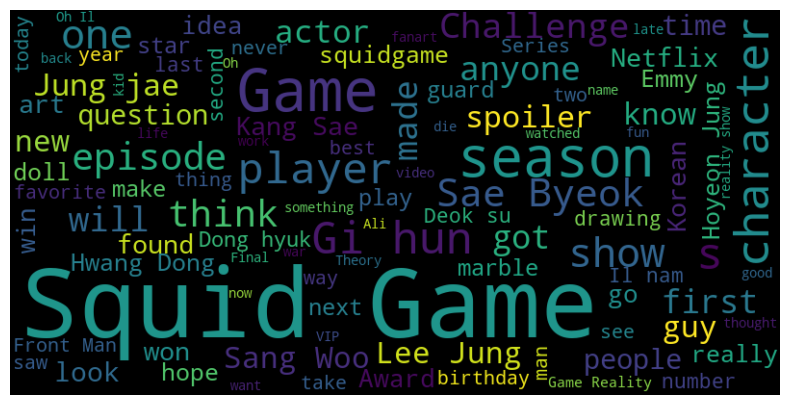

In [24]:
# Create a wordcloud object and pass the parameters you want
wc = WordCloud(background_color='black', max_words=100, width=800, height=400)

# Generate the wordcloud from the text in the column 'headlines' by joining all the words in the column with a space character
wc.generate(' '.join(squid_results['headlines']))

# Plot the wordcloud using the matplotlib.pyplot module
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Squid Game WordCloud highlighted a few characters / actors in the show. Thus merchandis with images of those personae should be sellable. 

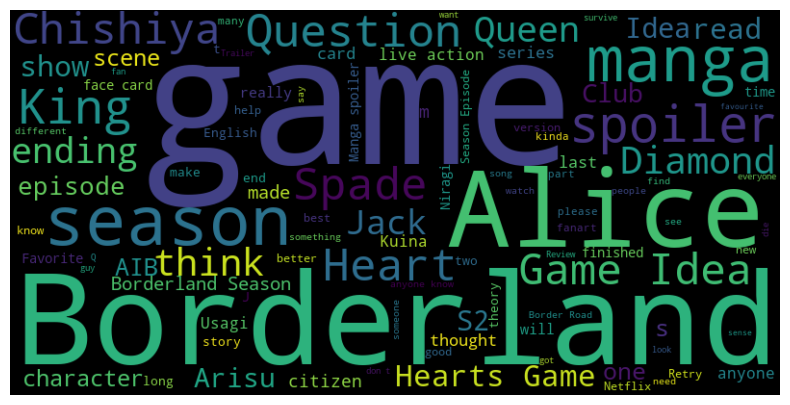

In [25]:
# Generate the wordcloud for ALice in Borderland
wc.generate(' '.join(alice_results['headlines']))

# Plot the wordcloud using the matplotlib.pyplot module
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Seems like the show itself is bigger than the characters. Although names like Chishiya, Arisu, Kuina, Usagi and Niragi showed up, they are not the top mentioned in posts. Perhaps, posters of the TV series will be better merchandise to sell for this show.

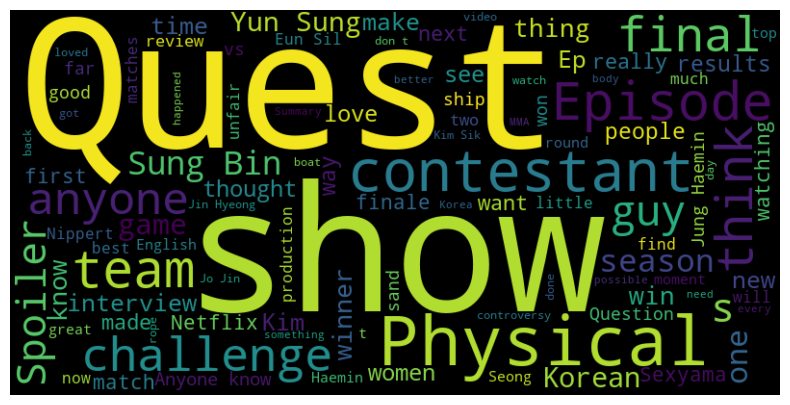

In [26]:
# Generate the wordcloud for Physical: 100
wc.generate(' '.join(physical_results['headlines']))

# Plot the wordcloud using the matplotlib.pyplot module
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Same as Alice in Borderland, the contestant names in the show are not the like the top mention in the post. The only 3 names that so far are visible in WordCloud are Sung Bin, Eun Sil, Jun Hyeong and Haemin (runner-up of Season 1)

## Putting all Three dfs Together

In [27]:
# Apply new column show_title
squid_results["show_title"] = 'squidgame' #for Squid Game
alice_results["show_title"] = 'aliceinborderland' # for Alice in Borderland
physical_results["show_title"] = 'physical100' # for physical 100

#concatenate all three df together and randomise the rows
df = pd.concat([squid_results, alice_results, physical_results])
df = df.sample(frac=1).reset_index(drop=True)
df.head(20)

,neg,neu,pos,compound,headlines,Label,show_title
0,0.000,1.000,0.000,0.0000,What are the games covered in the Alice on Bor...,0,aliceinborderland
1,0.000,1.000,0.000,0.0000,Alice in borderland manga ending question(s) (...,0,aliceinborderland
2,0.000,1.000,0.000,0.0000,(SPOILERS!!!) Next stage requirements??,0,aliceinborderland
3,0.000,1.000,0.000,0.0000,Euddeum on Knowing Bros Ep.372,0,physical100
4,0.000,0.843,0.157,0.4561,Learning how to make Dalgonas for my upcoming ...,1,squidgame
5,0.000,0.875,0.125,0.4329,I can’t believe we have to wait another week f...,1,physical100
6,0.000,1.000,0.000,0.0000,Anyone know who she is?,0,aliceinborderland
7,0.000,1.000,0.000,0.0000,Episode 8 in nutshell.,0,squidgame
8,0.000,1.000,0.000,0.0000,What would have happened if nobody had gotten ...,0,squidgame
9,0.000,0.593,0.407,0.6705,The best participants of every challenge and q...,1,physical100


## Preprocessing:
1. Apply and Adding New Stopwords
2. Remove Punctuations
3. Tokenizer
4. Stemmering
5. Lemmatization

### Import Sklearn and NLTK

In [28]:
# Import NLTK English corpus
from nltk.corpus import words
english_words = set(words.words())

# import stopwords and set as English
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# import string to later remove punctuations and define punctuations
import string
punctuations = string.punctuation

# tokenizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# import remove module
import re

# import stemmer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

# import lemmetizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Stopwords and Adding New Ones

In [29]:
# additional stopwords
new_stopwords = ["game", "spoiler", "spoilers"]
stop_words.update(new_stopwords)
new_stopwords_list = set(stop_words)

In [30]:
print(new_stopwords_list)

{'m', 'spoiler', 'these', "shouldn't", "don't", 'in', 'yourself', 'under', 'while', 'all', 'ma', 'a', 'wouldn', 'and', 'being', 'theirs', 'themselves', 'off', 'didn', 'needn', 'can', 'd', 'why', 'until', 'was', 'shouldn', 'on', 'its', 'do', 'won', 'he', 'is', 'some', "wouldn't", 'them', 'it', 'but', 'did', 'by', 'for', 'own', 'what', 'at', 'against', 'same', 'couldn', 'your', 've', 'her', 'my', 'about', 'an', 'nor', 'any', "hasn't", 'more', "didn't", 'himself', 'game', 'this', "aren't", 'other', 'down', 'up', 'too', 're', 'are', 'the', "mustn't", 'hasn', 'because', 'there', 'as', 'to', 'of', "it's", 'how', 'each', 'not', "haven't", 'from', 'few', 'during', 'been', "couldn't", 'after', 'now', "that'll", 'then', 't', 'if', 'once', 'have', 'yourselves', 'whom', 'hers', 'over', 'no', 'out', 'mightn', 'further', 's', 'ours', 'here', 'isn', 'has', 'his', 'again', 'had', 'she', "mightn't", 'y', 'spoilers', 'only', "you're", "she's", 'those', 'myself', 'they', 'into', 'above', "you'll", 'haven

### Stemming or Lemmatize?

The questions for the text classification analysis is always debatable. Should be stemming or lemmatizing the words. In order to find out which is better, I decided to create 2 columns for analysis.  

### Create a cleaned_text_stemmer column

In [31]:
#define function that cleans headlines
def preprocessing_stemmer(headline):
    #convert headline to lower case
    headline = headline.lower()
    #remove punctuation marks from headline
    headline = headline.strip(punctuations)
    #remove numericals
    headline = re.sub('[0-9]+|<|\(|\<|\:|\?', '', headline)
    #tokenize the headline
    words = []
    words = word_tokenize(headline)
    #remove stopwords from words 
    words = [word for word in words if word not in stop_words]
    #stem each word 
    words = [stemmer.stem(word) for word in words]
    #join stemmed words into clean text 
    clean_text_stemmer = " ".join(words)
    
    return clean_text_stemmer

#apply function to headlines column and assign it to cleaned_text_stemmer column 
df['cleaned_text_stemmer'] = df['headlines'].apply(preprocessing_stemmer)

#print dataframe with new column 
df

,neg,neu,pos,compound,headlines,Label,show_title,cleaned_text_stemmer
0,0.000,1.000,0.000,0.0000,What are the games covered in the Alice on Bor...,0,aliceinborderland,game cover alic border road manga one n't read
1,0.000,1.000,0.000,0.0000,Alice in borderland manga ending question(s) (...,0,aliceinborderland,alic borderland manga end question ) big
2,0.000,1.000,0.000,0.0000,(SPOILERS!!!) Next stage requirements??,0,aliceinborderland,! ! ! ) next stage requir
3,0.000,1.000,0.000,0.0000,Euddeum on Knowing Bros Ep.372,0,physical100,euddeum know bros ep .
4,0.000,0.843,0.157,0.4561,Learning how to make Dalgonas for my upcoming ...,1,squidgame,learn make dalgona upcom birthday . excit ! fi...
...,...,...,...,...,...,...,...,...
2715,0.000,0.671,0.329,0.5994,I would like to know who is making them play t...,1,aliceinborderland,would like know make play thank
2716,0.000,1.000,0.000,0.0000,7 more days until Season 2,0,aliceinborderland,day season
2717,0.000,1.000,0.000,0.0000,Naked guy game,0,aliceinborderland,nake guy
2718,0.434,0.566,0.000,-0.5574,Can someone explain the ending? Lost and Confused,-1,aliceinborderland,someon explain end lost confus


### Create Another Column with Lemmatized Words

In [32]:
#define function that cleans headlines

lemmatizer = WordNetLemmatizer()

def preprocessing_lemma(headline):
    #convert headline to lower case
    headline = headline.lower()
    #remove punctuation marks from headline
    headline = headline.strip(punctuations)
    #remove numericals
    headline = re.sub('[0-9]+|<|\(|\<|\:|\?', '', headline)
    #tokenize the headline
    words = []
    words = word_tokenize(headline)
    #remove stopwords from words 
    words = [word for word in words if word not in stop_words]
    #stem each word 
    words = [lemmatizer.lemmatize(word) for word in words]
    #join lemmatized words into clean text_lemma
    clean_text_lemma = " ".join(words)
    
    return clean_text_lemma
    
#apply function to headlines column and assign it to cleaned_text_stemmer column 
df['cleaned_text_lemma'] = df['headlines'].apply(preprocessing_lemma)

df

,neg,neu,pos,compound,headlines,Label,show_title,cleaned_text_stemmer,cleaned_text_lemma
0,0.000,1.000,0.000,0.0000,What are the games covered in the Alice on Bor...,0,aliceinborderland,game cover alic border road manga one n't read,game covered alice border road manga one n't read
1,0.000,1.000,0.000,0.0000,Alice in borderland manga ending question(s) (...,0,aliceinborderland,alic borderland manga end question ) big,alice borderland manga ending question ) big
2,0.000,1.000,0.000,0.0000,(SPOILERS!!!) Next stage requirements??,0,aliceinborderland,! ! ! ) next stage requir,! ! ! ) next stage requirement
3,0.000,1.000,0.000,0.0000,Euddeum on Knowing Bros Ep.372,0,physical100,euddeum know bros ep .,euddeum knowing bros ep .
4,0.000,0.843,0.157,0.4561,Learning how to make Dalgonas for my upcoming ...,1,squidgame,learn make dalgona upcom birthday . excit ! fi...,learning make dalgonas upcoming birthday . exc...
...,...,...,...,...,...,...,...,...,...
2715,0.000,0.671,0.329,0.5994,I would like to know who is making them play t...,1,aliceinborderland,would like know make play thank,would like know making play thanks
2716,0.000,1.000,0.000,0.0000,7 more days until Season 2,0,aliceinborderland,day season,day season
2717,0.000,1.000,0.000,0.0000,Naked guy game,0,aliceinborderland,nake guy,naked guy
2718,0.434,0.566,0.000,-0.5574,Can someone explain the ending? Lost and Confused,-1,aliceinborderland,someon explain end lost confus,someone explain ending lost confused


## Preparation for Modelling and Scores

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

SVM is one of the more popular text classification model. I will be using this model for my text classification predictions. 

### Using Stemmering

#### Define X and y

In [34]:
X = df.loc[:, "cleaned_text_stemmer"].values

In [35]:
y = df.loc[:, "show_title"]

#### Check Arrays for Consistency

In [36]:
X.shape

(2720,)

In [37]:
y.shape

(2720,)

#### Split Train Test sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
#Check Array after X, y split

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1904,)
X_test:  (816,)
y_train:  (1904,)
y_test:  (816,)


In [40]:
# Import SVM for modelling
svm = SVC()

# Create a pipeline for modelling
pipeline_stem = Pipeline([('tfidf', TfidfVectorizer()),
                           ('clf', svm),
                          ])

In [41]:
# Fitting the pipeline for prediction
pipeline_stem.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

#### Generate Score Metrices

In [42]:
predictions_stem = pipeline_stem.predict(X_test)

print ("Accuracy Score for Stemming is: ", accuracy_score(y_test, predictions_stem))

Accuracy Score for Stemming is:  0.821078431372549


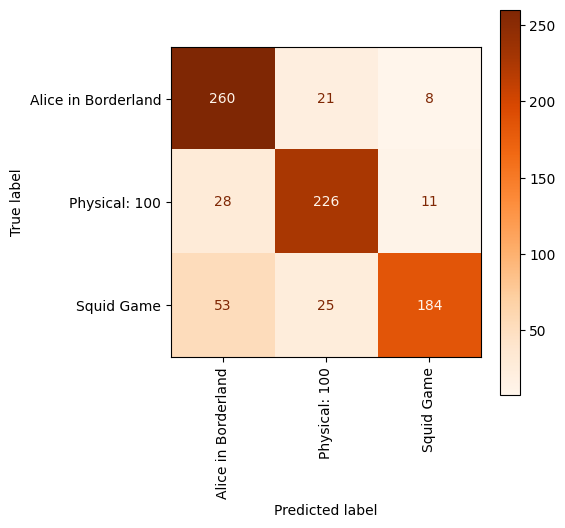

In [43]:
cm_stem = confusion_matrix(y_test, predictions_stem)

# Plot the confusion matrix
disp_stem = ConfusionMatrixDisplay(confusion_matrix=cm_stem, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_stem.plot(ax=ax, cmap=plt.cm.Oranges, xticks_rotation='vertical')
plt.show()

From the Confusion matrix, Squid game has the most misclassified as Alice in Borderland. This is not surprising as both shared very similar storyline and show format. Alice in Borderland has higher recall because the main differential topic of poker cards. Thus it is very likely that any mention of poker cards will be correctly classified in Alice in Borderland.  

In [44]:
svm_stem_report = classification_report(y_test, predictions_stem, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Stemmering \n\n", svm_stem_report)

SVM Report for Stemmering 

                      precision    recall  f1-score   support

Alice in Borderland       0.76      0.90      0.83       289
      Physical: 100       0.83      0.85      0.84       265
         Squid Game       0.91      0.70      0.79       262

           accuracy                           0.82       816
          macro avg       0.83      0.82      0.82       816
       weighted avg       0.83      0.82      0.82       816



In the first SVM modelling using stemming, Physical: 100 show the best result in text classification. Perhaps the show format is slightly different from the other 2 as it is more of a game contest; whereas Alice and Squid are both dramas. 

## Using Lemmetization

In [45]:
X = df.loc[:, "cleaned_text_lemma"].values
y = df.loc[:, "show_title"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1904,)
X_test:  (816,)
y_train:  (1904,)
y_test:  (816,)


In [48]:
pipeline_lemma = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', svm),
                    ])

pipeline_lemma.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

#### Scoring for Lemmatization

In [49]:
predictions_lemma = pipeline_lemma.predict(X_test)

print ("Accuracy Score for Lemmatization is: ", accuracy_score(y_test, predictions_lemma))

Accuracy Score for Lemmatization is:  0.8026960784313726


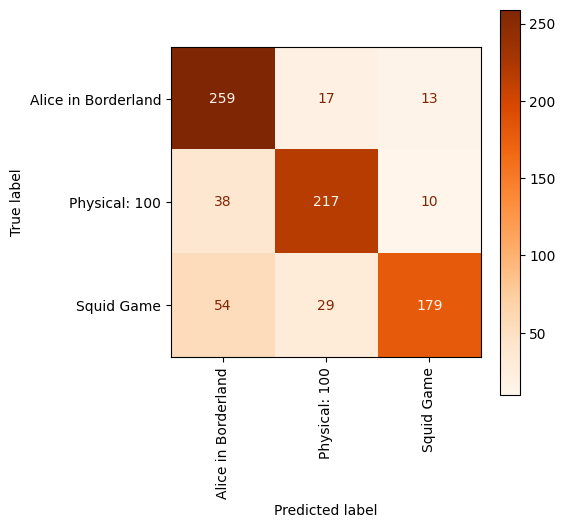

In [50]:
cm_lemma = confusion_matrix(y_test, predictions_lemma)

# Plot the confusion matrix
disp_lemma = ConfusionMatrixDisplay(confusion_matrix=cm_lemma, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_lemma.plot(ax=ax, cmap=plt.cm.Oranges, xticks_rotation='vertical')
plt.show()

In [51]:
svm_lemma_report = classification_report(y_test, predictions_lemma, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Lemmatization \n\n", svm_lemma_report)

SVM Report for Lemmatization 

                      precision    recall  f1-score   support

Alice in Borderland       0.74      0.90      0.81       289
      Physical: 100       0.83      0.82      0.82       265
         Squid Game       0.89      0.68      0.77       262

           accuracy                           0.80       816
          macro avg       0.82      0.80      0.80       816
       weighted avg       0.81      0.80      0.80       816



The SVM modelling using lemmatization yields slightly lower scores than word stemming. I decided to use word stemming for my final modelling

### Comparing Confusion Matrix of both Stemmering and Lemmatization

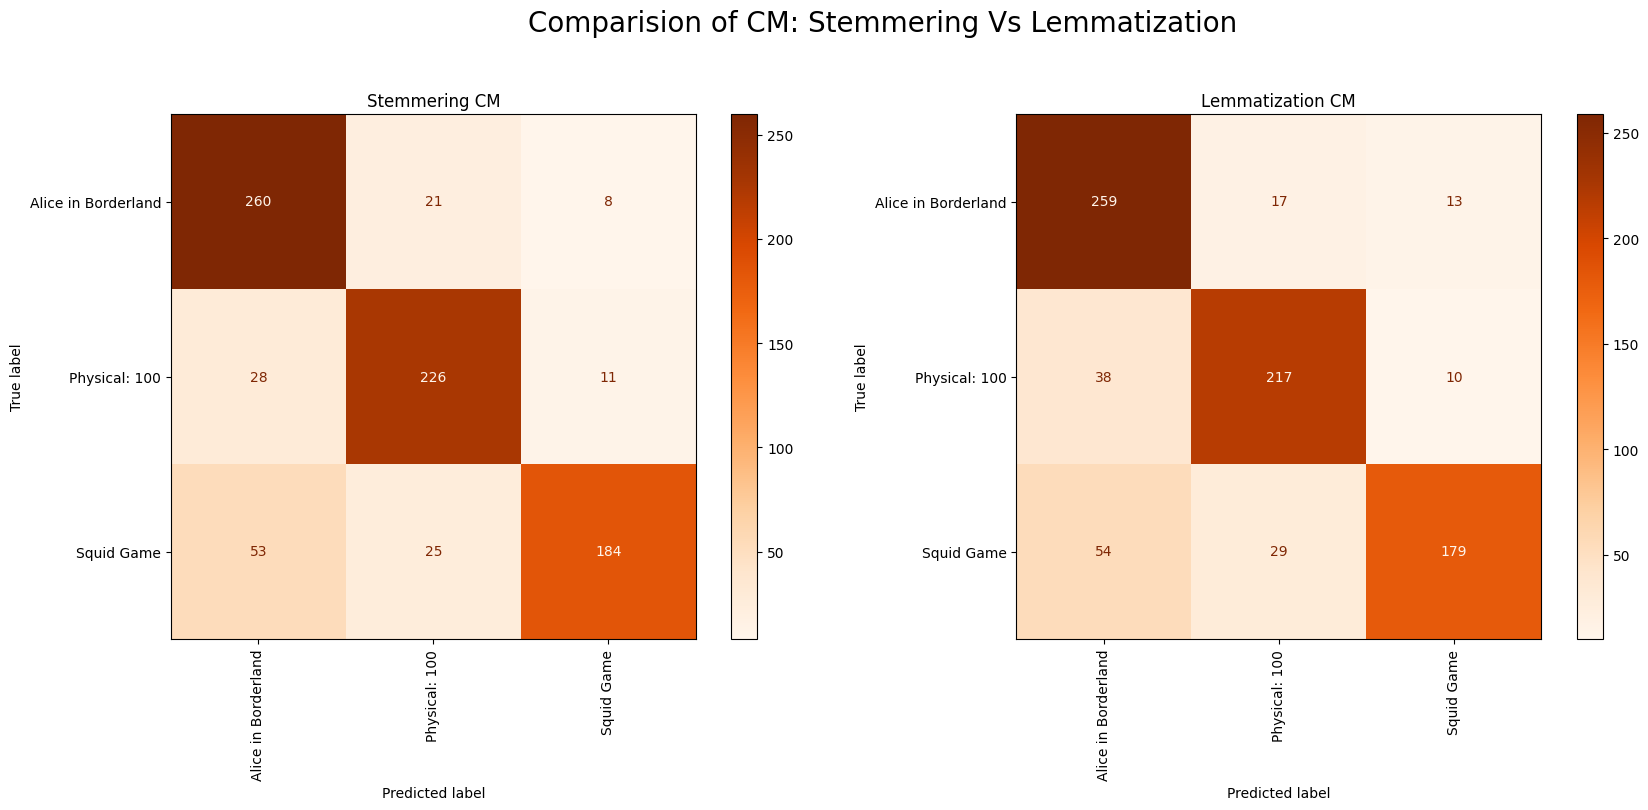

In [52]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
disp_stem.plot(ax=ax1, cmap=plt.cm.Oranges, xticks_rotation='vertical')
disp_lemma.plot(ax=ax2, cmap=plt.cm.Oranges, xticks_rotation='vertical')
ax1.set_title('Stemmering CM')
ax2.set_title('Lemmatization CM')
plt.suptitle("Comparision of CM: Stemmering Vs Lemmatization", fontsize=20, y=0.95)
plt.show()

From the Confusion Matrix comparision, Stemming have slightly higher TP and lower FN and FP. 

### Get Parameters for Tuning using GridSearchCV

In [53]:
# Check the list of available parameters for the estimator
print(pipeline_lemma.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])


In [54]:
# import gridsearchcv and progress bar libaries
from sklearn.model_selection import GridSearchCV

In [55]:
"""
# Define the hyperparameters to tune
param_grid = {'clf__C': [0.1, 1, 10, 100, 250, 500, 750, 1000], 
              'clf__kernel': ['linear', 'rbf'], 
              'clf__gamma': [10, 1, 0.8, 0.5, 0.2, 0.09], 
              'tfidf__max_df': [0.01, 0.05, 0.1, 0.25, 0.5, 1],
              'tfidf__max_features': [500, 1000, 5000, 10000],
              'tfidf__ngram_range': [(1,1), (1,2), (1,3)]
             }

# Define the GridSearchCV object
grid_search = GridSearchCV(pipeline_lemma, param_grid, cv=5)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)
"""

"\n# Define the hyperparameters to tune\nparam_grid = {'clf__C': [0.1, 1, 10, 100, 250, 500, 750, 1000], \n              'clf__kernel': ['linear', 'rbf'], \n              'clf__gamma': [10, 1, 0.8, 0.5, 0.2, 0.09], \n              'tfidf__max_df': [0.01, 0.05, 0.1, 0.25, 0.5, 1],\n              'tfidf__max_features': [500, 1000, 5000, 10000],\n              'tfidf__ngram_range': [(1,1), (1,2), (1,3)]\n             }\n\n# Define the GridSearchCV object\ngrid_search = GridSearchCV(pipeline_lemma, param_grid, cv=5)\n\n# Fit the GridSearchCV object on the training data\ngrid_search.fit(X_train, y_train)\n\n# Print the best hyperparameters\nprint(grid_search.best_params_)\n\n# print how our model looks after hyper-parameter tuning\nprint(grid_search.best_estimator_)\n"

### GridSearchCV Results:

In order to save time from running GridSearchCV, the following params is considered the recommended one:

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=5000,
                                 ngram_range=(1, 3), sublinear_tf=True)),
                ('clf', SVC(C=5, gamma=0.8))])

### Tuned Pipeline for Lemmatization

In [56]:
pipeline_lemma_tuned = Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3), 
                                                                 max_features = 5000, sublinear_tf=True)),
                                       ('clf', SVC(C=5, gamma=0.8))
                                      ])

In [57]:
pipeline_lemma_tuned.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=5000,
                                 ngram_range=(1, 3), sublinear_tf=True)),
                ('clf', SVC(C=5, gamma=0.8))])

In [58]:
predictions_lemma_tuned = pipeline_lemma_tuned.predict(X_test)

print ("Accuracy Score for Tuned Lemmatization is: ", accuracy_score(y_test, predictions_lemma_tuned))

Accuracy Score for Tuned Lemmatization is:  0.7977941176470589


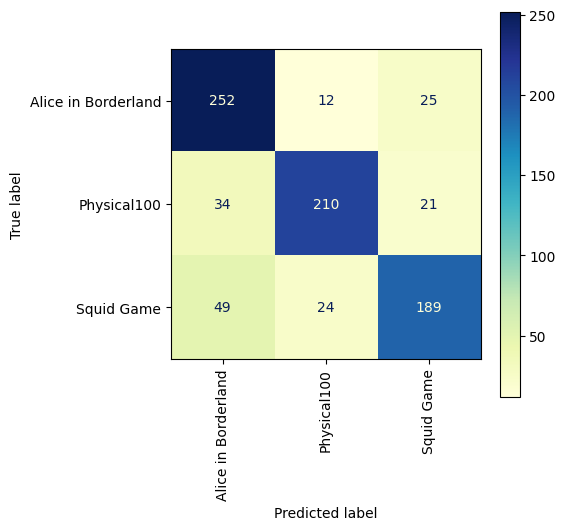

In [59]:
cm_tuned_lemma = confusion_matrix(y_test, predictions_lemma_tuned)

# Plot the confusion matrix
disp_tuned_lemma = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lemma, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_tuned_lemma.plot(ax=ax, cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
plt.show()

In [60]:
svm_tuned_lemma_report = classification_report(y_test, predictions_lemma_tuned, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])

print("SVM Report for Lemmatization with Hyperparameter Tuning \n\n", svm_lemma_report)

SVM Report for Lemmatization with Hyperparameter Tuning 

                      precision    recall  f1-score   support

Alice in Borderland       0.74      0.90      0.81       289
      Physical: 100       0.83      0.82      0.82       265
         Squid Game       0.89      0.68      0.77       262

           accuracy                           0.80       816
          macro avg       0.82      0.80      0.80       816
       weighted avg       0.81      0.80      0.80       816



Overall, the parameter tuning does not improve much on the SVM model for lemmatization.

### Tuned SVM Pipeline for Stemmering with Scores

In [61]:
X = df.loc[:, "cleaned_text_stemmer"].values
y = df.loc[:, "show_title"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
pipeline_tuned_stem = Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.2, ngram_range=(1, 3), 
                                                                 max_features = 5000, sublinear_tf=True)),
                                       ('clf', SVC(C=5, gamma=0.8))
                                      ])

In [64]:
pipeline_tuned_stem.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.2, max_features=5000,
                                 ngram_range=(1, 3), sublinear_tf=True)),
                ('clf', SVC(C=5, gamma=0.8))])

In [65]:
pred_tuned_stem = pipeline_tuned_stem.predict(X_test)

accuracy_score(y_test, pred_tuned_stem)

0.8100490196078431

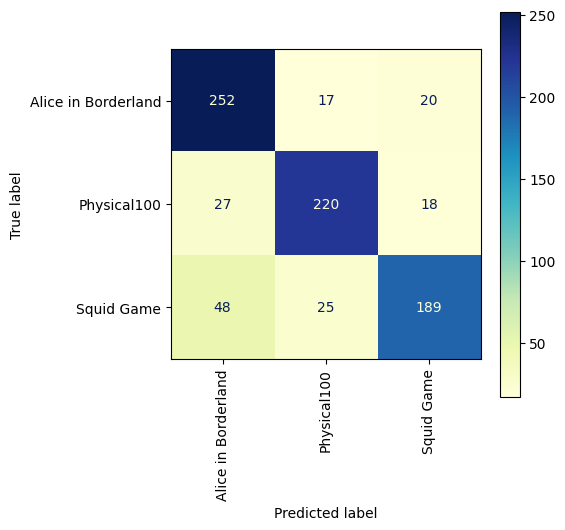

In [66]:
cm_tuned_stem = confusion_matrix(y_test, pred_tuned_stem)

# Plot the confusion matrix
disp_tuned_stem = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_stem, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp_tuned_stem.plot(ax=ax, cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
plt.show()

In [67]:
tuned_stem_svm_report = classification_report(y_test, pred_tuned_stem, target_names=['Alice in Borderland', 'Physical: 100', 'Squid Game'])
print (tuned_stem_svm_report)

                     precision    recall  f1-score   support

Alice in Borderland       0.77      0.87      0.82       289
      Physical: 100       0.84      0.83      0.83       265
         Squid Game       0.83      0.72      0.77       262

           accuracy                           0.81       816
          macro avg       0.81      0.81      0.81       816
       weighted avg       0.81      0.81      0.81       816



### Comparing SVM with and without Hyperparameter tuning

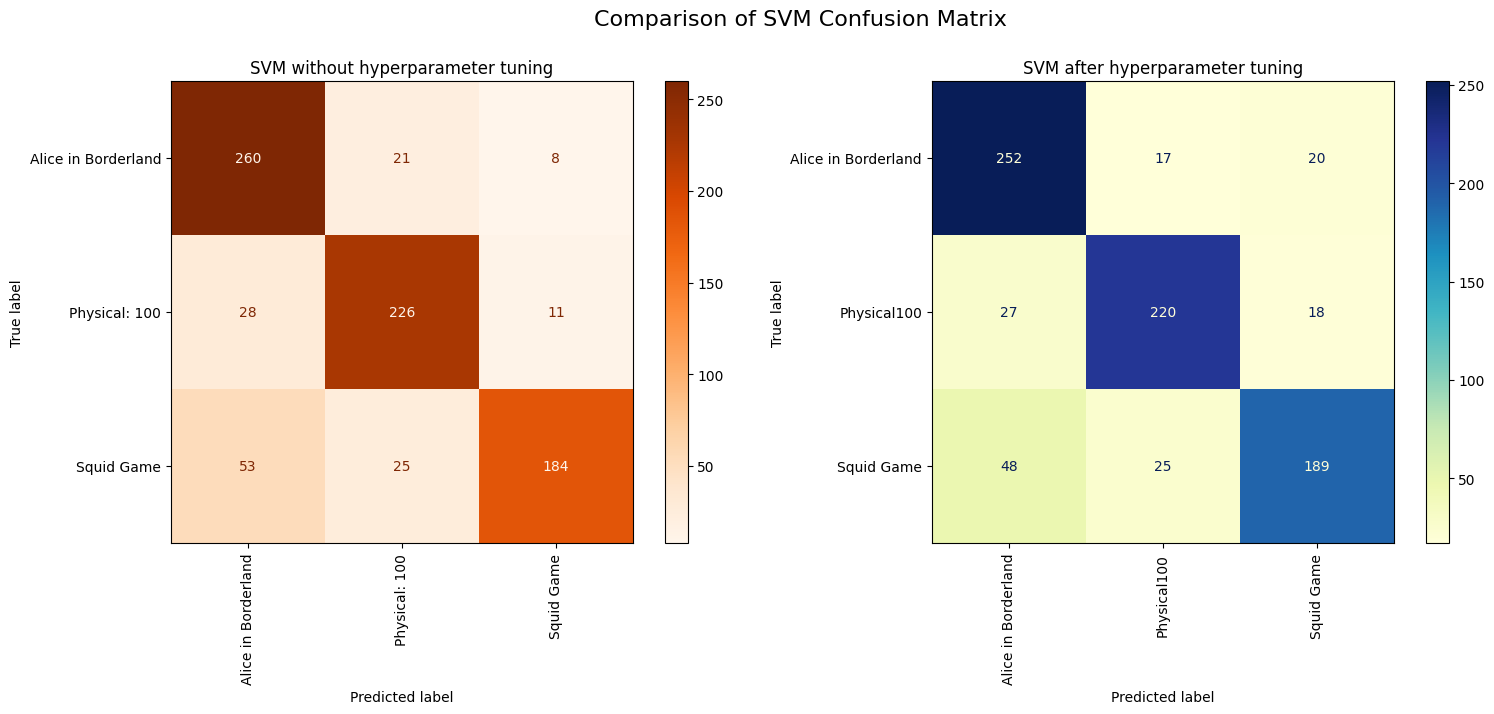

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stem, display_labels=['Alice in Borderland', 'Physical: 100', 'Squid Game'])
disp.plot(ax=axs[0], cmap=plt.cm.Oranges, xticks_rotation='vertical')
axs[0].set_title('SVM without hyperparameter tuning')

# Plot the second confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_stem, display_labels=['Alice in Borderland', 'Physical100', 'Squid Game'])
disp.plot(ax=axs[1], cmap=plt.cm.YlGnBu, xticks_rotation='vertical')
axs[1].set_title('SVM after hyperparameter tuning')

# Add the main title
fig.suptitle('Comparison of SVM Confusion Matrix', fontsize=16, y=1)

plt.show()

Hyperparameter tuning doesn't not change much from the actual modelling. As such, I will use the default params for my text classification modelling. 

## Pipeline Deployment and Prediction

In [124]:
# Make predictions on new data
new_data = pd.DataFrame({"headlines": ["Will Gi-Hun get a happy ending in season 2?",
                                       "Sexyama Proves Age Is Just A Number During Impressive Run On Netflix",
                                       "7 Hidden Easter Eggs In Alice In Borderland That'll Make You Rewatch Despite That Heart Game",
                                       "Did anyone notice that Nam Kyung Jin looks like Taiwanese Singer Jay Chou?",
                                       "How Joker cards can be most dangerous in next season show",
                                      "Did the old man die?",
                                      "Are wrestlers better than MMA fighters?",
                                      "What happened at the beach?"]
                        })


In [125]:
new_data

,headlines
0,Will Gi-Hun get a happy ending in season 2?
1,Sexyama Proves Age Is Just A Number During Imp...
2,7 Hidden Easter Eggs In Alice In Borderland Th...
3,Did anyone notice that Nam Kyung Jin looks lik...
4,How Joker cards can be most dangerous in next ...
5,Did the old man die?
6,Are wrestlers better than MMA fighters?
7,What happened at the beach?


In [126]:
#apply function to headlines column and assign it to cleaned_text_stemmer column 
new_data['cleaned_text_stemmer'] = new_data['headlines'].apply(preprocessing_stemmer)

In [127]:
new_data

,headlines,cleaned_text_stemmer
0,Will Gi-Hun get a happy ending in season 2?,gi-hun get happi end season
1,Sexyama Proves Age Is Just A Number During Imp...,sexyama prove age number impress run netflix
2,7 Hidden Easter Eggs In Alice In Borderland Th...,hidden easter egg alic borderland ll make rewa...
3,Did anyone notice that Nam Kyung Jin looks lik...,anyon notic nam kyung jin look like taiwanes s...
4,How Joker cards can be most dangerous in next ...,joker card danger next season show
5,Did the old man die?,old man die
6,Are wrestlers better than MMA fighters?,wrestler better mma fighter
7,What happened at the beach?,happen beach


In [128]:
# Create a pipeline for modelling
pipeline_stem = Pipeline([('tfidf', TfidfVectorizer()),
                           ('clf', svm),
                          ])

# Fitting the pipeline for prediction
pipeline_stem.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [129]:
# Extract the vocabulary and feature weights from the trained TfidfVectorizer
tfidf_vectorizer = pipeline_tuned_stem.named_steps['tfidf']
vocab = tfidf_vectorizer.vocabulary_
feature_weights = tfidf_vectorizer.idf_

In [130]:
#get predictions
predictions = pipeline_stem .predict(new_data["cleaned_text_stemmer"])

# Print the predicted show_title for each sentence
for sentence, prediction in zip(new_data["headlines"], predictions):
    print(f"Sentence: {sentence}\nPrediction: {prediction}\n")

Sentence: Will Gi-Hun get a happy ending in season 2?
Prediction: squidgame

Sentence: Sexyama Proves Age Is Just A Number During Impressive Run On Netflix
Prediction: physical100

Sentence: 7 Hidden Easter Eggs In Alice In Borderland That'll Make You Rewatch Despite That Heart Game
Prediction: aliceinborderland

Sentence: Did anyone notice that Nam Kyung Jin looks like Taiwanese Singer Jay Chou?
Prediction: physical100

Sentence: How Joker cards can be most dangerous in next season show
Prediction: aliceinborderland

Sentence: Did the old man die?
Prediction: squidgame

Sentence: Are wrestlers better than MMA fighters?
Prediction: physical100

Sentence: What happened at the beach?
Prediction: aliceinborderland



### Conclusion

The final prediction is pretty accurate when feed in new data. All 8 sentences were correctly predicted to the right show. 